# <span style="color:indigo;"> **Bank Customer Churn Model | Machine Learning | Python**

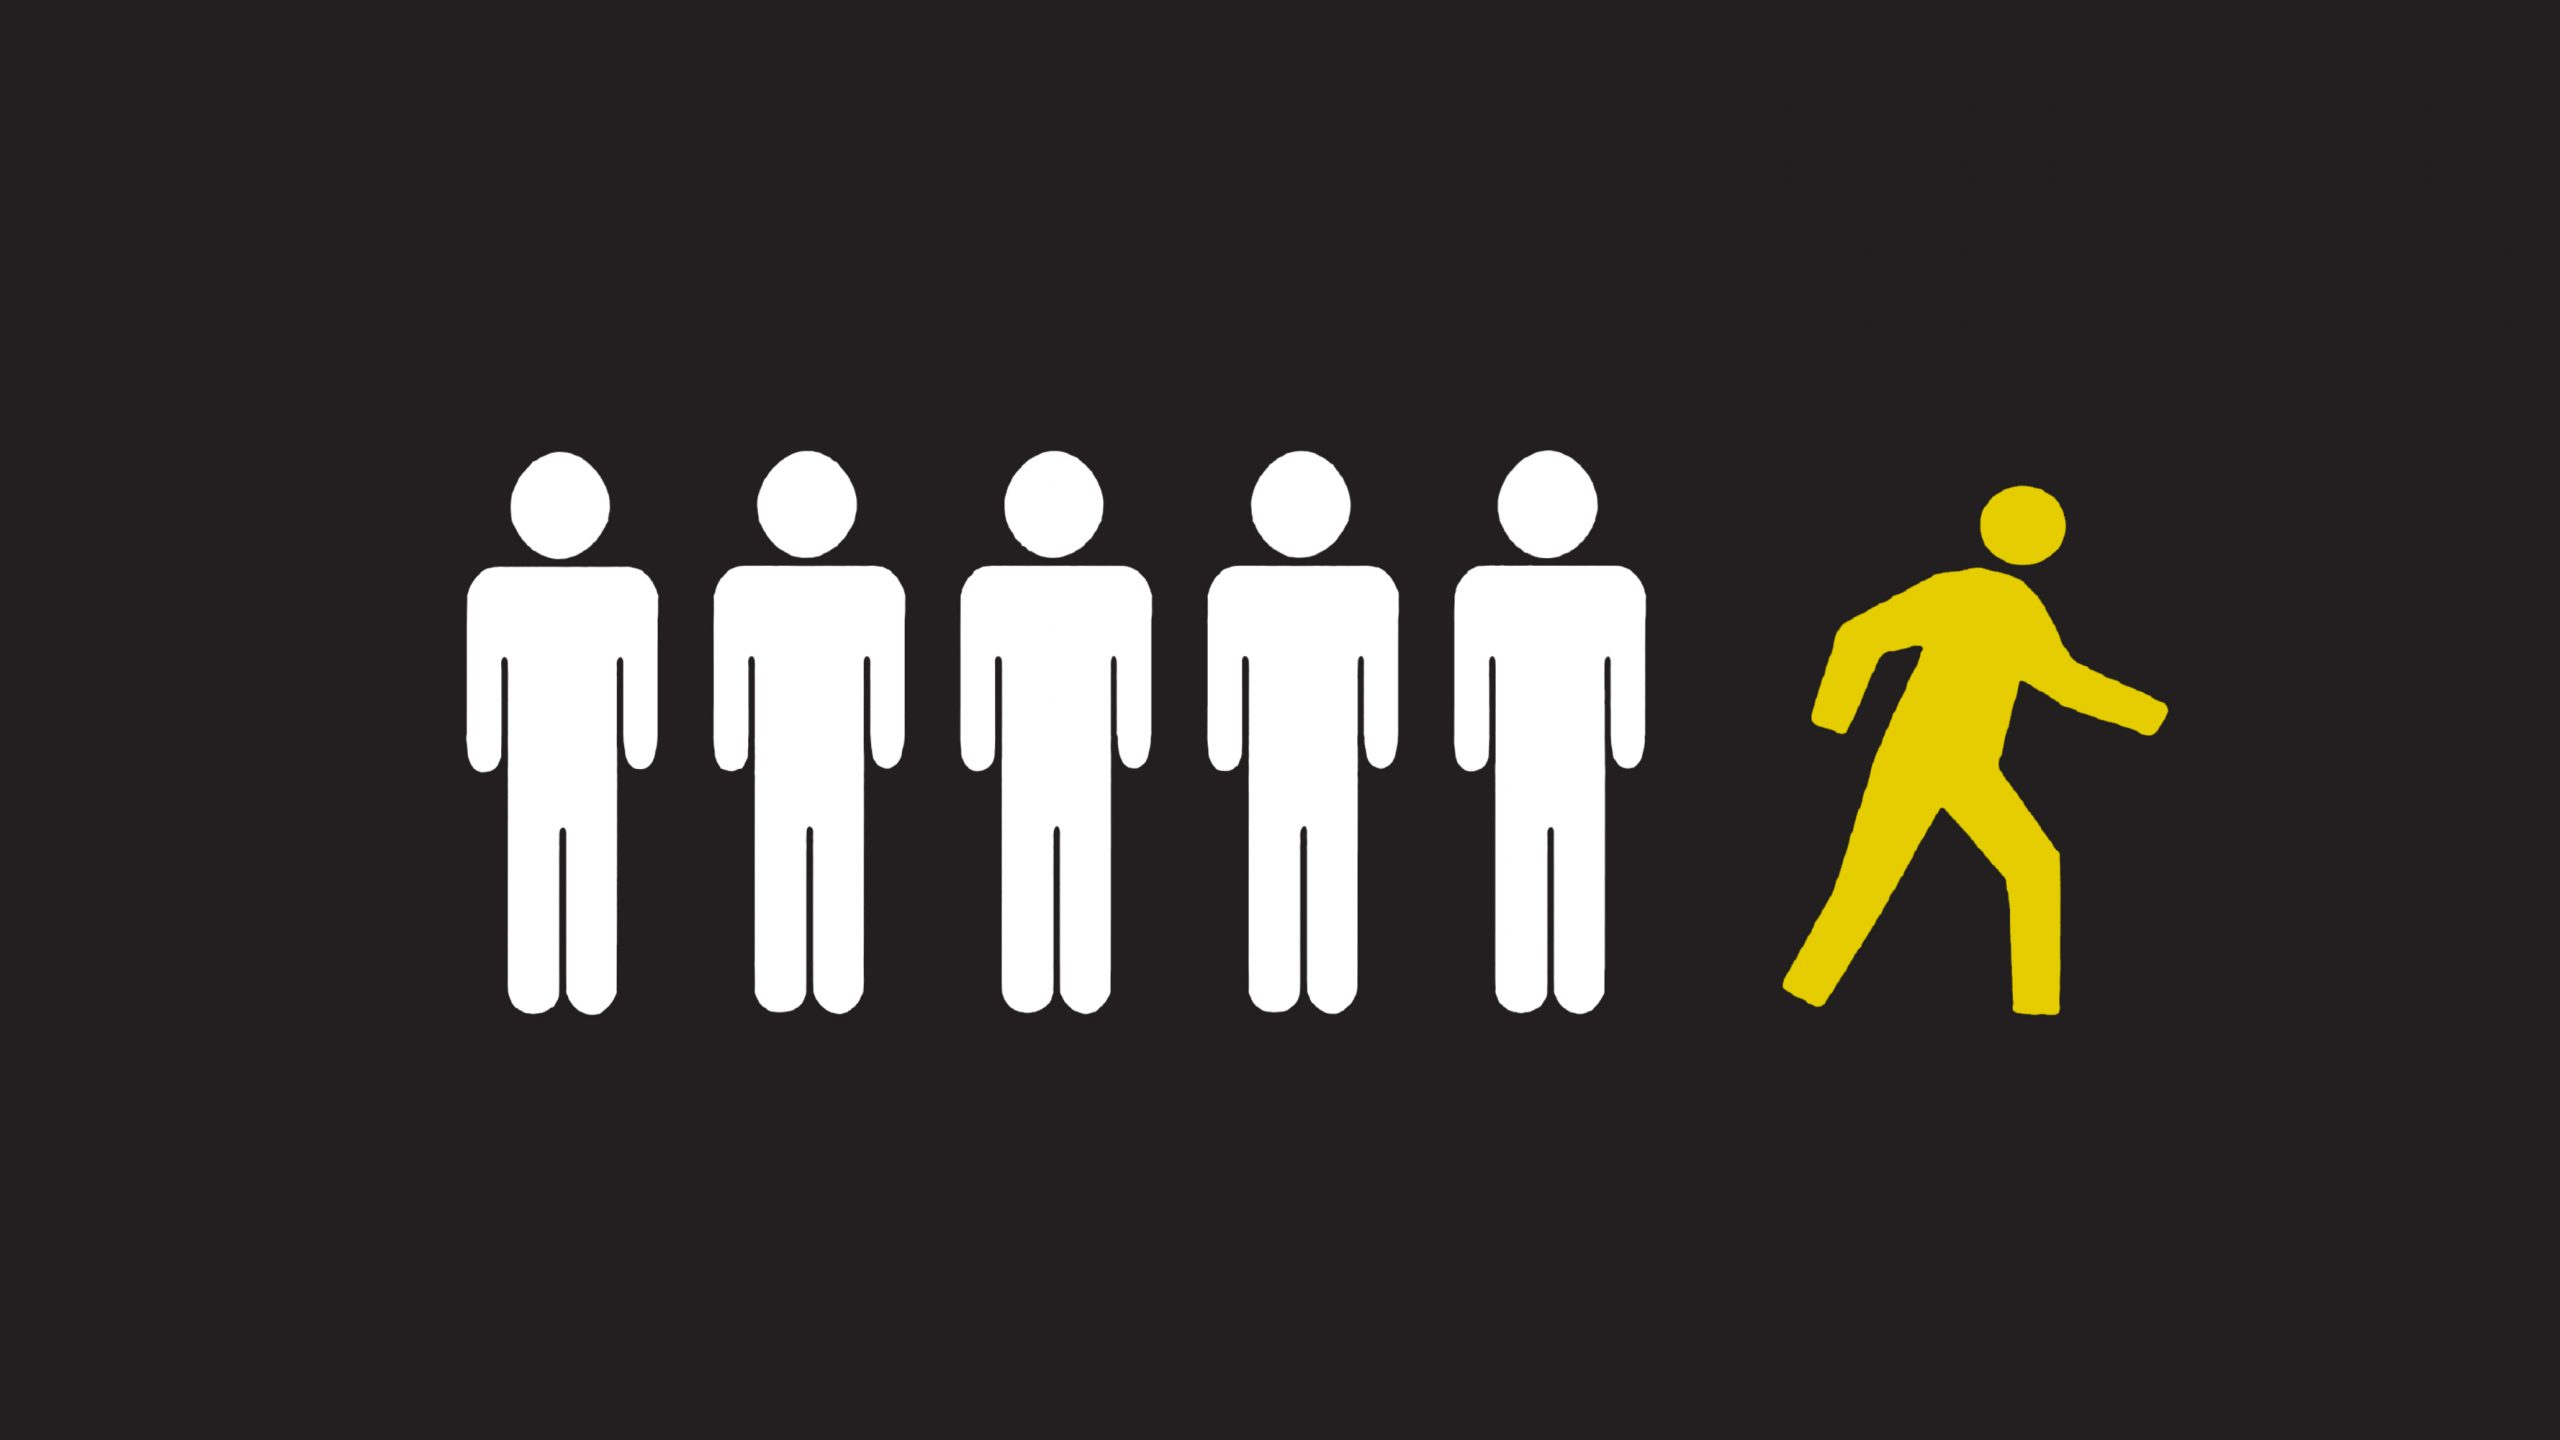

### <span style="color:indigo;"> **Objective**
    
* #### Data Encoding
* #### Feature Scaling
* #### Handling Imbalance Data
    #####  1.Random Under Sampling
    #####  2.Random Over Sampling
* #### Support Vector Machine Classifier
* #### Grid Search for Hyperparameter Tunning    

### <span style="color:indigo;"> **Data Source**
    
####          This dataset contains 10,000 records, each of it corresponds to a different bank's user. The target is ExitedTask, a binary variable that describes whether the user decided to leave the bank. There are row and customer identifiers, four columns describing personal information about the user (surname, location, gender and age), and some other columns containing information related to the loan (such as credit score, current balance in the user's account and whether they are an active member among others). To download the dataset
[Click here](https://github.com/YBIFoundation/Dataset/blob/main/Bank%20Churn%20Modelling.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.duplicated('CustomerId').sum()

0

In [5]:
df= df.set_index('CustomerId')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


### <span style="color:indigo"> **Encoding**

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.replace({'Gender':{'Male':0, 'Female':1}}, inplace = True)

In [11]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [12]:
df.replace({'Num Of Products':{1:0, 2:1, 3:1, 4:1}}, inplace= True)

In [13]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [14]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [15]:
# we need to find how many customers having zero balance and had left the bank

df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [16]:
df['Zero Balance']= np.where(df['Balance']>0, 1, 0)

<Axes: >

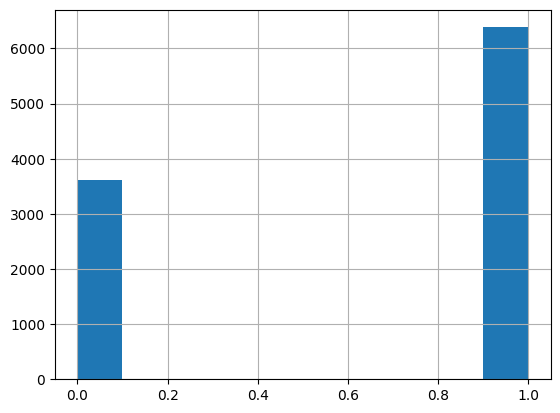

In [17]:
df['Zero Balance'].hist()

In [18]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

### <span style="color:indigo"> **Define Label & Features**

In [19]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [20]:
y= df['Churn']
x= df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary','Zero Balance']]

In [21]:
x.shape, y.shape

((10000, 11), (10000,))

In [22]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

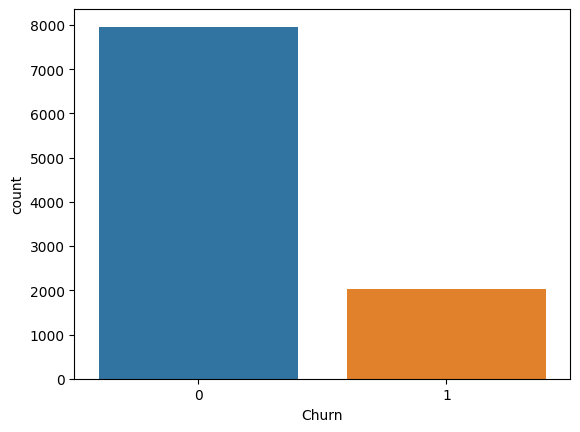

In [23]:
sns.countplot(x='Churn', data= df);

In [24]:
x.shape, y.shape

((10000, 11), (10000,))

### <span style="color:indigo"> **Random Under Sampling**

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus= RandomUnderSampler(random_state=2529)

In [26]:
x_rus, y_rus = rus.fit_resample(x,y)
x_rus.shape, y_rus.shape, x.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [27]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [28]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

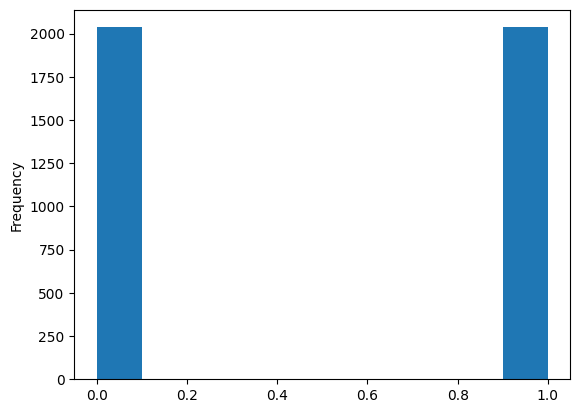

In [29]:
y_rus.plot(kind= 'hist')

### <span style="color:indigo"> **Random Over Sampling**

In [30]:
from imblearn.over_sampling import RandomOverSampler
ros= RandomOverSampler(random_state=2529)

In [31]:
x_ros, y_ros = ros.fit_resample(x,y)
x_ros.shape, y_ros.shape, x.shape, y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [32]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [33]:
y_ros.value_counts()

Churn
1    7963
0    7963
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

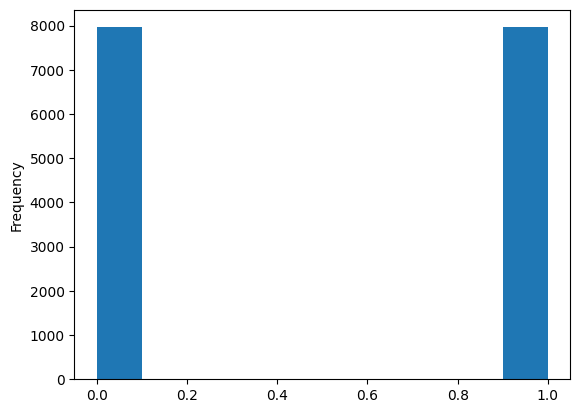

In [34]:
y_ros.plot(kind = 'hist')

### <span style="color:indigo"> **Train Test Split**

In [35]:
from sklearn.model_selection import train_test_split

### <span style="color:indigo">**Split Original Data**

In [36]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state= 2529)

### <span style="color:indigo">**Split Random Under Sample Data**

In [37]:
x_train_rus,x_test_rus,y_train_rus,y_test_rus= train_test_split(x_rus,y_rus, test_size= 0.3, random_state= 2529)

### <span style="color:indigo">**Split Random Over Sample Data**

In [38]:
x_train_ros,x_test_ros,y_train_ros,y_test_ros= train_test_split(x_ros,y_ros, test_size= 0.3, random_state= 2529)

### <span style="color:indigo">**Standardize Features**

In [39]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

### <span style="color:indigo">**Standardize Original Data**

In [40]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [41]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### <span style="color:indigo">**Standardize Random Under Sample Data**

In [42]:
x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [43]:
x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### <span style="color:indigo">**Standardize Random Over Sample Data**

In [44]:
x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [45]:
x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]= sc.fit_transform(x_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

### <span style="color:indigo">**Support Vector Machine Classifier**

In [46]:
from sklearn.svm import SVC
svc= SVC()

In [47]:
svc.fit(x_train,y_train)

SVC()

In [48]:
y_pred= svc.predict(x_test)

### <span style="color:indigo">**Model Accuracy**

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[2381,   33],
       [ 436,  150]])

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2414
           1       0.82      0.26      0.39       586

    accuracy                           0.84      3000
   macro avg       0.83      0.62      0.65      3000
weighted avg       0.84      0.84      0.81      3000



### <span style="color:indigo">**Hyper Parameter Tunning**

In [51]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C':[0.1,1, 10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [52]:
grid= GridSearchCV(SVC(),param_grid,refit= True, verbose=2, cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.9s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [53]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [54]:
grid_predictions = grid.predict(x_test)
confusion_matrix(y_test,grid_predictions)

array([[2159,  255],
       [ 343,  243]])

In [55]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      2414
           1       0.49      0.41      0.45       586

    accuracy                           0.80      3000
   macro avg       0.68      0.65      0.66      3000
weighted avg       0.79      0.80      0.79      3000



#### <span style="color:indigo">*The accuracy score is not bad. But as you can see the precision & recall are very low. So we will try do the model with random under sampling and random over sampling to get better accuracy and recall value.*

### <span style="color:indigo">**Model with Random Under Sampling**

In [56]:
svc_rus= SVC()
svc_rus.fit(x_train_rus,y_train_rus)
y_pred_rus= svc_rus.predict(x_test_rus)

### <span style="color:indigo">**Model Accuracy**

In [57]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[470, 157],
       [174, 422]])

In [58]:
print(classification_report(y_test_rus,y_pred_rus))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       627
           1       0.73      0.71      0.72       596

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



### <span style="color:indigo">**Hyperparameter Tunning**

In [59]:
param_grid= {'C':[0.1,1, 10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

grid_rus= GridSearchCV(SVC(),param_grid,refit= True, verbose=2, cv=2)
grid_rus.fit(x_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [60]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.1)


In [61]:
grid_predictions_rus = grid_rus.predict(x_test_rus)
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[476, 151],
       [172, 424]])

In [62]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       627
           1       0.74      0.71      0.72       596

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



### <span style = "color:indigo">**Model with Random Over Sampling**

In [63]:
svc_ros= SVC()
svc_ros.fit(x_train_ros,y_train_ros)
y_pred_ros= svc_ros.predict(x_test_ros)

### <span style = "color:indigo">**Model Accuracy**

In [64]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[1823,  556],
       [ 626, 1773]])

In [65]:
print(classification_report(y_test_ros,y_pred_ros))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76      2379
           1       0.76      0.74      0.75      2399

    accuracy                           0.75      4778
   macro avg       0.75      0.75      0.75      4778
weighted avg       0.75      0.75      0.75      4778



#### <span style = "color:indigo">*Random Under Sample with or without Hyperparameter tunning and Random Over Sample default model has almost same accuracy. But much higher than the raw data model.*

### <span style = "color:indigo">**Hyperparameter Tunning**

In [66]:
param_grid= {'C':[0.1,1, 10],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

grid_ros= GridSearchCV(SVC(),param_grid,refit= True, verbose=2, cv=2)
grid_ros.fit(x_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [67]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [68]:
grid_predictions_ros = grid_ros.predict(x_test_ros)
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2047,  332],
       [  68, 2331]])

In [69]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      2379
           1       0.88      0.97      0.92      2399

    accuracy                           0.92      4778
   macro avg       0.92      0.92      0.92      4778
weighted avg       0.92      0.92      0.92      4778



### <span style = "color:indigo">**Conclusion**
    
####    **After running Hyperparameter Tunning in Random Over Sample we got 92% accuracy, 97% recall & 88% precision. Compared to other model, it can predict with an accuracy level of 92%.**